In [1]:
from feature_selector import FeatureSelector

import pandas as pd

In [2]:
train = pd.read_csv('fullset.csv')
train_labels = train['A16']
train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,u,g,0.000,w,0,True,v,1.25,True,1,False,202,g,Success
1,a,58.67,u,g,4.460,q,560,True,h,3.04,True,6,False,43,g,Success
2,a,24.5,u,g,0.500,q,824,False,h,1.50,True,0,False,280,g,Success
3,b,27.83,u,g,1.540,w,3,True,v,3.75,True,5,True,100,g,Success
4,b,20.17,u,g,5.625,w,0,False,v,1.71,True,0,False,120,s,Success


In [4]:
train = train.drop(columns = ['A16'])

In [5]:
fs = FeatureSelector(data = train, labels = train_labels)

In [6]:
#------------------------- correlation----------------------------------------

In [23]:
fs.identify_collinear(correlation_threshold=0.0000001)

6 features with a correlation magnitude greater than 0.00.



In [24]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['A7', 'A8', 'A10', 'A11', 'A12']

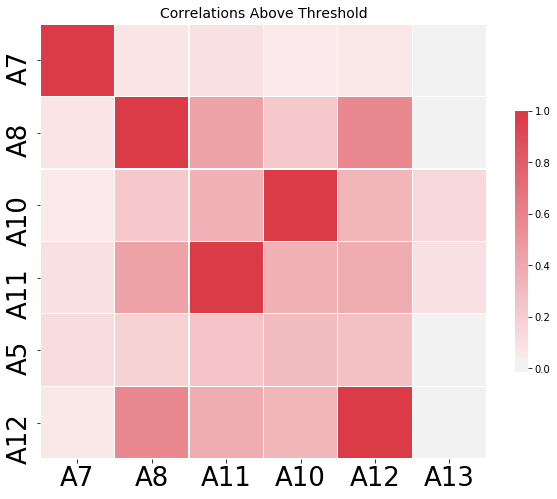

In [25]:
fs.plot_collinear()

In [26]:


fs.record_collinear.head()



,drop_feature,corr_feature,corr_value
0,A7,A5,0.123121
1,A8,A5,0.174846
2,A8,A7,0.077652
3,A10,A5,0.298902
4,A10,A7,0.051345


In [27]:


fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)



Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.969265	valid_0's binary_logloss: 0.240936
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.949025	valid_0's binary_logloss: 0.288313
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.942091	valid_0's binary_logloss: 0.378924
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[124]	valid_0's auc: 0.960645	valid_0's binary_logloss: 0.278297
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[93]	valid_0's auc: 0.913793	valid_0's binary_logloss: 0.379791
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.971139	valid_0's binary_logloss: 0.229555

In [28]:


one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))



There are 15 original features
There are 560 one-hot features


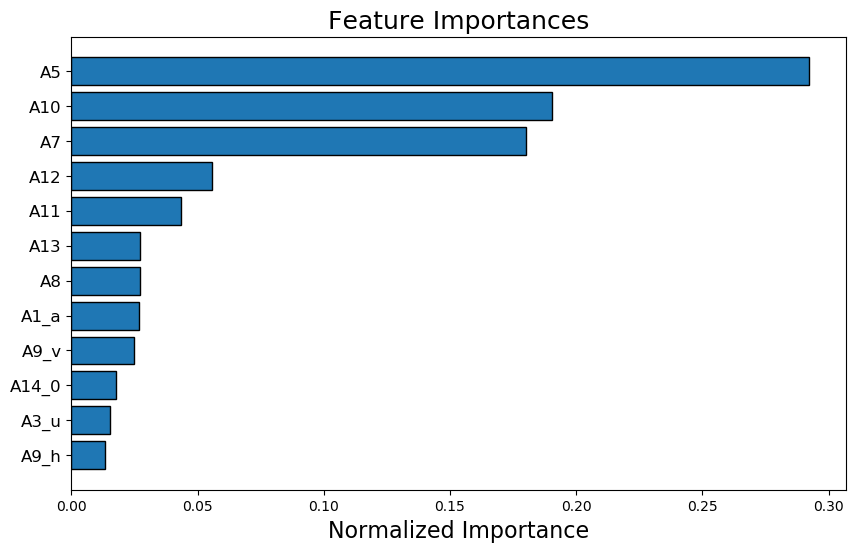

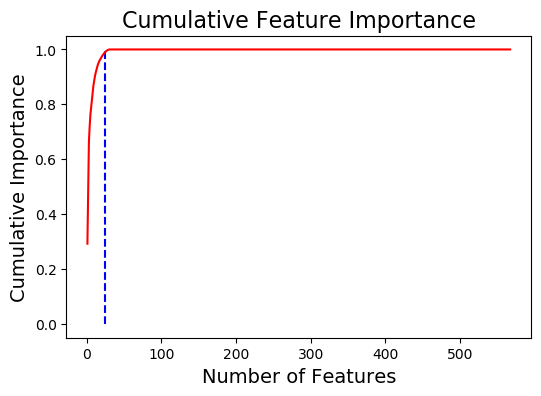

25 features required for 0.99 of cumulative importance


In [29]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [30]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,A5,437.3,0.292430,0.292430
1,A10,284.9,0.190518,0.482948
2,A7,269.1,0.179952,0.662900
3,A12,83.4,0.055771,0.718671
4,A11,65.0,0.043467,0.762137
5,A13,40.8,0.027284,0.789421
6,A8,40.5,0.027083,0.816504
7,A1_a,39.8,0.026615,0.843119
8,A9_v,36.9,0.024676,0.867795
9,A14_0,26.7,0.017855,0.885649


In [31]:
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)

100

In [32]:
fs.identify_low_importance(cumulative_importance = 0.99)

24 features required for cumulative importance of 0.99 after one hot encoding.
543 features do not contribute to cumulative importance of 0.99.



In [33]:


low_importance_features = fs.ops['low_importance']
low_importance_features[:5]



['A6_k', 'A6_ff', 'A14_100', 'A6_d', 'A14_200']

In [35]:


train_no_missing = fs.remove(methods = ['zero_importance'])



Removed 535 features.


In [36]:
all_to_remove = fs.check_removal()
all_to_remove[10:25]

Total of 549 features identified for removal


['A14_204',
 'A2_33.92',
 'A2_17.92',
 'A14_431',
 'A14_340',
 'A2_49.17',
 'A2_39.92',
 'A2_36.33',
 'A2_39.83',
 'A2_19.75',
 'A2_18.25',
 'A2_20.42',
 'A14_152',
 'A2_57.08',
 'A2_30.08']

In [37]:


train_removed = fs.remove(methods = 'all')



['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 549 features.


In [38]:


train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)



['collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 566 features including one-hot features.


In [39]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 15
Final Number of Features:  9


In [42]:
train_removed_all.head()

,A1,A2,A3,A4,A5,A6,A9,A14,A15
0,b,30.83,u,g,0.000,w,v,202,g
1,a,58.67,u,g,4.460,q,h,43,g
2,a,24.5,u,g,0.500,q,h,280,g
3,b,27.83,u,g,1.540,w,v,100,g
4,b,20.17,u,g,5.625,w,v,120,s


TypeError: 'numpy.int32' object is not callable